In [1]:
# load the autoreload extension
%reload_ext autoreload
# Set extension to reload modules every time before executing code
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
%matplotlib inline

# Import random forest regressor and multioutput regressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [2]:
path = '/mnt/data4/Abhishek/WP/'
data = np.load('machine_learning_data.npy')

In [3]:
def extractIndex(filename):
    return int(filename.split('_')[-1][:4])

In [4]:
f = np.loadtxt('/home/ajana/github/HODProject/parameters.txt')

In [5]:
random_data = []

for filename in os.listdir(path):
    if filename.startswith('wp_galaxies'):
        pos = extractIndex(filename)
        wp,_ = np.load(os.path.join(path,filename))
        #_temp = np.concatenate((wp,f[pos]))
        random_data.append(wp)

In [6]:
full_data = np.vstack((random_data))
full_data = np.hstack((full_data,data))
del random_data
np.random.shuffle(full_data)

In [7]:
X_data = pd.DataFrame(full_data[:,:-5])
y_data = pd.DataFrame(full_data[:,-5:])

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1,random_state=42)

In [9]:
X_train.shape, X_test.shape

((4500, 89), (500, 89))

In [19]:
#fit Random Forest Regressor

reg_rf = RandomForestRegressor(
    n_estimators=3000,
    criterion='mse',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=-1,
    random_state=0,
    verbose=0,
    warm_start=False,
)

reg_rf.fit(X_train,y_train)
y_rf = reg_rf.predict(X_test)


In [20]:
mean_squared_error(y_rf,y_test,multioutput='raw_values',squared=False)

array([0.00297281, 0.00278096, 0.00297699, 0.05069243, 0.00269805])

In [21]:
print (np.mean(((y_rf - y_test)/y_test)*100, axis=0))

0    0.000306
1   -0.024559
2    0.250191
3    4.206011
4    0.010084
dtype: float64


In [15]:
def plot_corr(pred,test):
    sns.jointplot(pred.iloc[:,0],test.iloc[:,0],kind = "kde")
    sns.jointplot(pred.iloc[:,1],test.iloc[:,1],kind = 'kde',color='purple')
    sns.jointplot(pred.iloc[:,2],test.iloc[:,2],kind = 'kde',color='blue')
    sns.jointplot(pred.iloc[:,3],test.iloc[:,3],kind = 'kde',color='green')
    sns.jointplot(pred.iloc[:,4],test.iloc[:,4],kind = 'kde',color='red')
    plt.tight_layout
    
def plot_error(pred,test,dims=(12,8)):
    fig,ax = plt.subplots(figsize=dims)
    sns.distplot(pred.iloc[:,0]-test.iloc[:,0],color='blue',ax=ax,kde_kws={"label": "M_cut"})
    sns.distplot(pred.iloc[:,1]-test.iloc[:,1],color='cyan',ax=ax,kde_kws={"label": "M_1"})
    sns.distplot(pred.iloc[:,2]-test.iloc[:,2],color='purple',ax=ax,kde_kws={"label": "Sigma"})
    sns.distplot(pred.iloc[:,3]-test.iloc[:,3],color='yellow',ax=ax,kde_kws={"label": "Kappa"})
    sns.distplot(pred.iloc[:,4]-test.iloc[:,4],color='red',ax=ax,kde_kws={"label": "Alpha"})

In [23]:
y_rf = pd.DataFrame(y_rf)

y_test.reset_index(drop=True, inplace=True)
y_rf.reset_index(drop=True, inplace=True)


In [24]:
pd.concat([y_test,y_rf], axis = 1)

,0,1,2,3,4,0,1,2,3,4
0,13.153835,14.003416,1.123853,1.415197,0.932810,13.074200,14.076947,1.040831,1.127329,0.905581
1,12.993567,14.038456,1.052863,1.395696,1.061349,13.057314,14.050435,1.132380,1.065021,1.002542
2,13.025092,14.069002,0.967042,1.009981,0.811734,13.074919,14.071417,1.011870,1.106888,0.803038
3,13.051674,13.997230,0.772365,1.377584,0.736650,13.096206,14.069892,0.821395,1.162194,0.812465
4,13.196128,14.038363,0.963045,0.922744,0.927098,13.097290,14.061006,0.867613,1.154798,0.981980
...,...,...,...,...,...,...,...,...,...,...
495,13.157274,13.988197,1.105746,1.170996,0.730374,13.088051,14.059163,1.026306,1.152796,0.841435
496,13.134182,14.080298,0.882001,1.121141,0.734372,13.102730,14.081111,0.845228,1.110265,0.797902
497,12.985325,14.067689,0.827574,1.415838,1.032668,13.087506,14.042307,0.928364,1.172682,1.022609
498,13.071842,14.065909,1.056659,0.885491,0.745053,13.063024,14.077101,1.025227,1.074335,0.807354


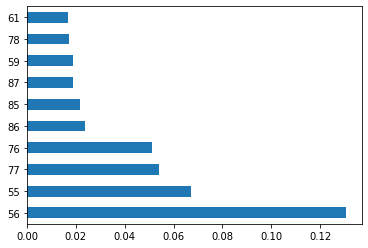

In [25]:
feat_importances = pd.Series(reg_rf.feature_importances_, index=X_data.columns)
feat_importances.nlargest(10).plot(kind='barh')

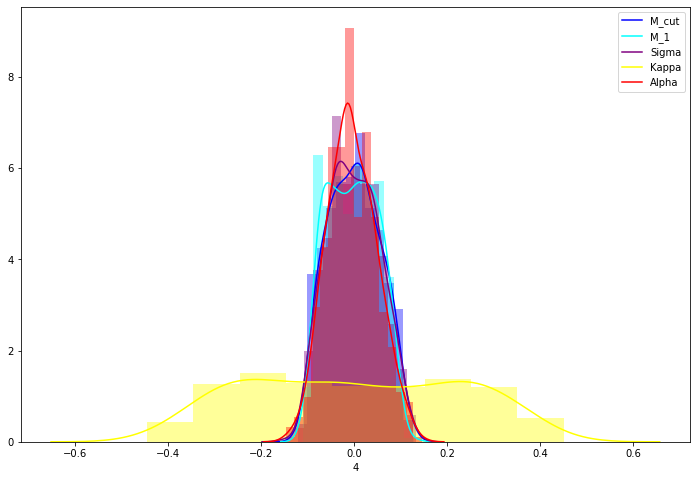

In [26]:
plot_error(y_rf,y_test)

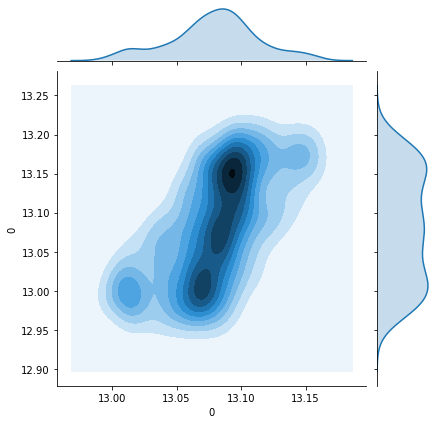

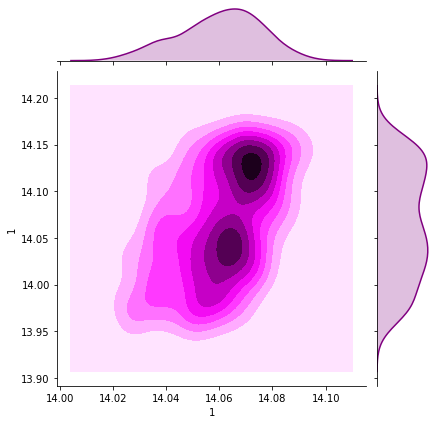

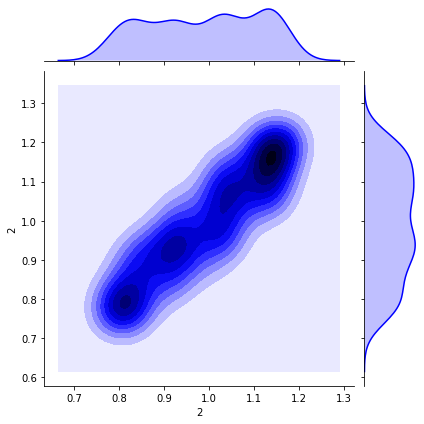

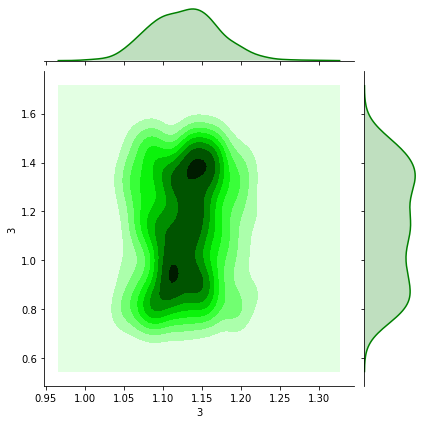

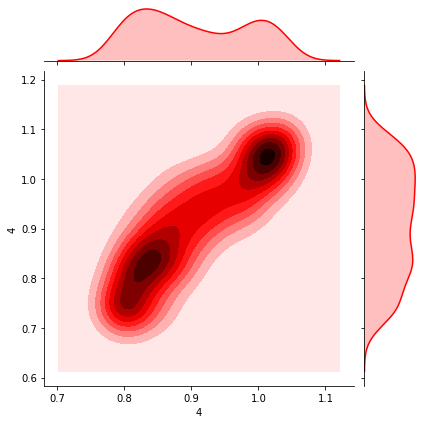

In [27]:
plot_corr(y_rf,y_test)

In [10]:
from xgboost import XGBRegressor

#good res for n_est = 10000, lr = 0.05

#fit multioutput regressor
multioutputregressor = MultiOutputRegressor(XGBRegressor(max_depth=10000,n_estimators=10000, 
                                                         learning_rate=0.05,
                                                         objective = 'reg:squarederror',
                                                         booster='gbtree',
                                                         n_jobs=-1,verbosity=1))
multioutputregressor.fit(X_train, y_train)
# predicting
y_multirf = multioutputregressor.predict(X_test)


In [11]:
print (np.mean((y_multirf - y_test)*100/(y_test), axis=0))
multioutputregressor.score(X_test,y_test)

0   -0.005860
1   -0.020455
2    0.003689
3    2.046513
4   -0.003275
dtype: float64


0.5237564123646361

In [12]:
y_multirf = pd.DataFrame(y_multirf)
y_multirf.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [13]:
# Root Mean Squared error

print("y1 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,0], y_multirf.iloc[:,0]))) 
print("y2 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,1], y_multirf.iloc[:,1])))
print("y3 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,2], y_multirf.iloc[:,2]))) 
print("y4 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,3], y_multirf.iloc[:,3])))
print("y5 MSE:%.4f" % np.sqrt(mean_squared_error(y_test.iloc[:,4], y_multirf.iloc[:,4]))) 

y1 MSE:0.0484
y2 MSE:0.0451
y3 MSE:0.0402
y4 MSE:0.2311
y5 MSE:0.0362


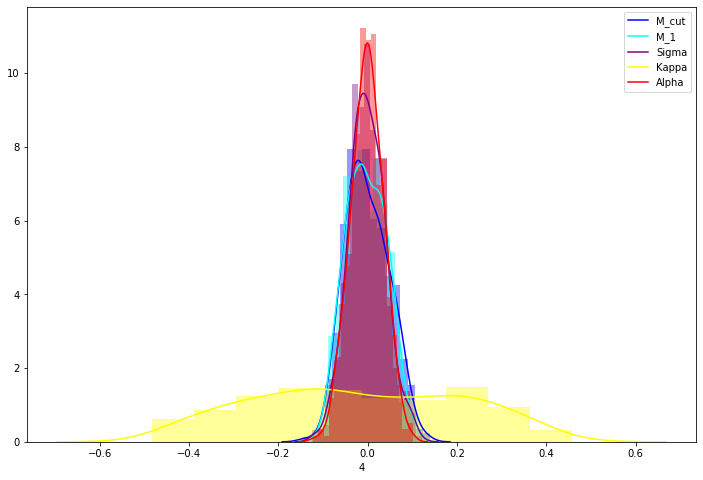

In [16]:
plot_error(y_multirf,y_test)

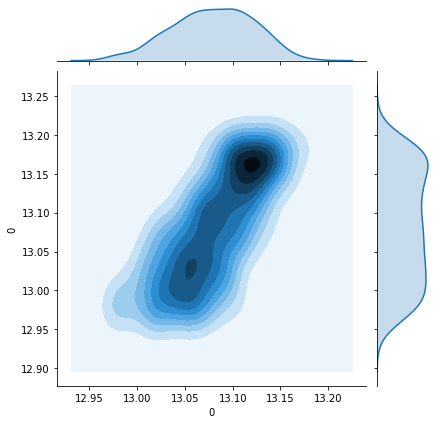

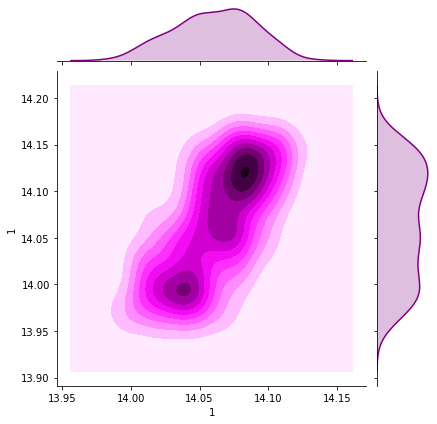

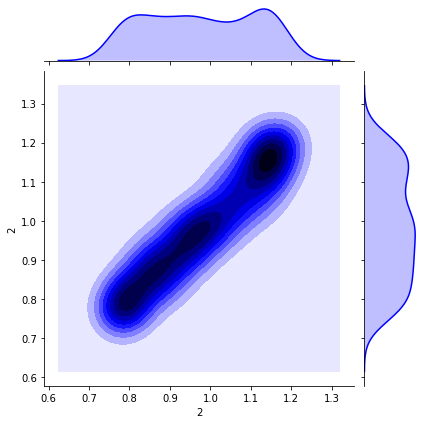

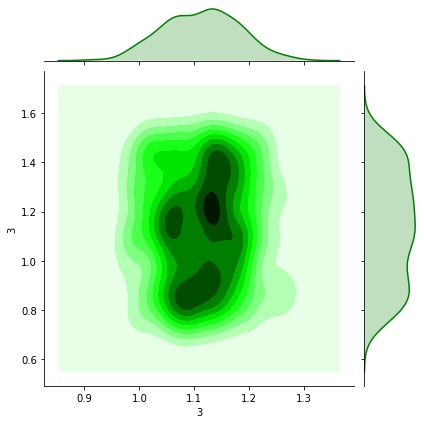

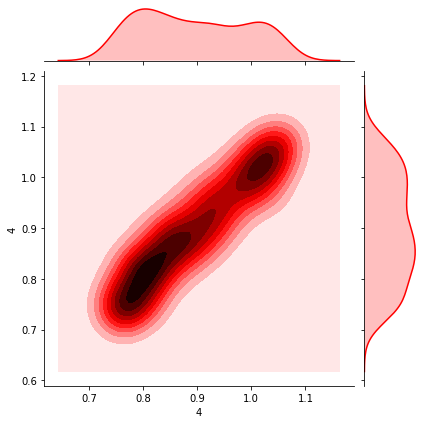

In [17]:
plot_corr(y_multirf,y_test)

In [ ]:
x_ax = range(len(X_test))
plt.scatter(x_ax[:30], y_test.iloc[:30,4],  s=6, label="y1-test")
plt.plot(x_ax[:30], y_multirf.iloc[:30,4], label="y1-pred")
#plt.scatter(x_ax[:20], y_test.iloc[:20,4],  s=6, label="y2-test")
#plt.plot(x_ax[:20], y_multirf.iloc[:20,4], label="y2-pred")
plt.legend()
plt.show()

In [35]:
a = np.arange(9).reshape(-1,3)
b = a

In [36]:
np.hstack((a,b))

array([[0, 1, 2, 0, 1, 2],
       [3, 4, 5, 3, 4, 5],
       [6, 7, 8, 6, 7, 8]])